In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
Recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recent

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)
Lastyear

datetime.date(2016, 8, 23)

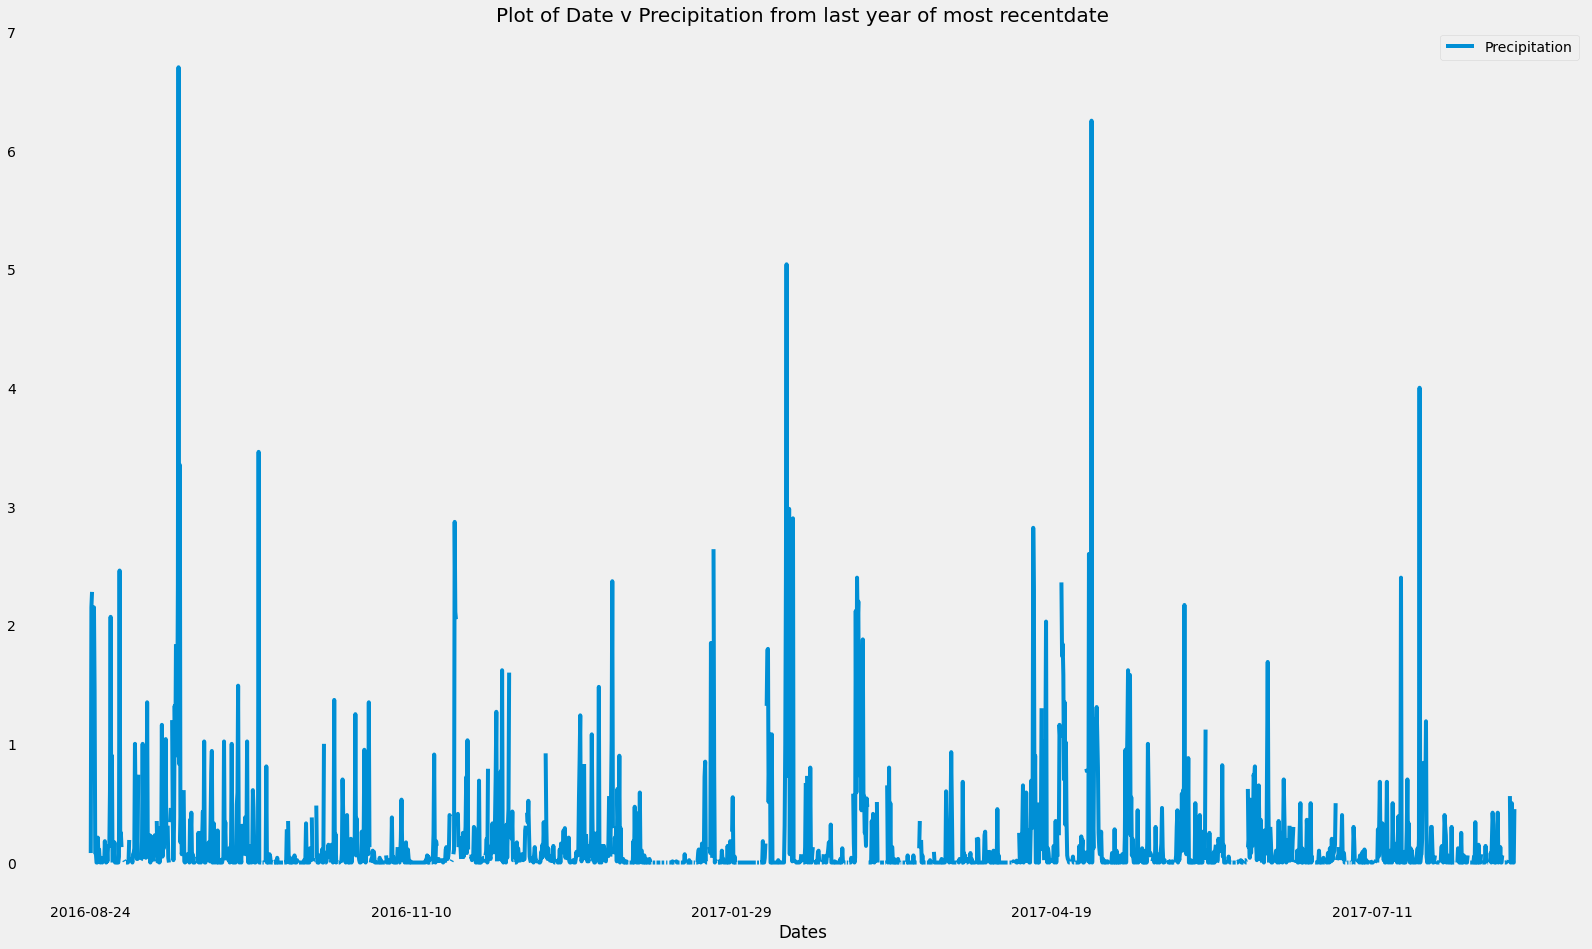

In [12]:
# Perform a query to retrieve the data and precipitation scores
NewData = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
NewDataFrame = pd.DataFrame(NewData, columns = ['Precipitation','Dates'])
NewDataFrame.set_index('Dates')
# Sort the dataframe by date
NewDataFrame_sort = NewDataFrame.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
NewDataFrame_sort.plot(x = 'Dates',figsize=(25,15),grid = False)
plt.title("Plot of Date v Precipitation from last year of most recentdate",size = 20)
plt.show
plt.savefig('Images/Precipitation.png')

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
NewDataFrame_sort.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
StationCount = session.query(Measurement.station).distinct().count()
StationCount

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
StationInfo = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).order_by(func.count(Measurement.station).desc()).all()
StationInfo

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ActiveStation = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281' ).all()


print("The Minimum ,Maximum and Average Temp for the most active station is :" , ActiveStation)

The Minimum ,Maximum and Average Temp for the most active station is : [(54.0, 85.0, 71.66378066378067)]


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastdata = session.query (Measurement.date).filter(Measurement.station == 'USC00519281').\
          order_by(Measurement.date.desc()).first()
lastdata_year = dt.date(2017,8,18)-dt.timedelta(days=365)
lastdata_year

Final =  session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281' ).filter(Measurement.date >= '2016,8,18').all()
Final

[(74.0,),
 (72.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (76.0,),
 (75.0,),
 (74.0,),
 (74.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (66.0,),
 (71.0,),
 (73.0,),
 (75.0,),
 (63.0,),
 (61.0,),
 (62.0,),
 (65.0,),
 (65.0,),
 (75.0,),
 (78.0,),
 (69.0,),
 (65.0,),
 (69.0,),
 (64.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (68.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (69.0,),
 (70.0,),
 (56.0,),
 (57.0,),
 (58.0,),
 (61.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (60.0,),
 (69.0,),
 (67.0,),
 (64.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (69.0,),
 (72.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (72.0,),
 (67.0,),
 (74.0,),
 (66.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (72.0,),
 (71.0,),
 (70.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (66.0,),
 (65.0,),
 (63.0,),
 (64.0,),
 (72.0,),
 (76.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (62.0,),
 (65.0,),
 (68.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (65.0,),
 (69.0,),
 (65.0,),
 (68.0,),
 (74.0,),


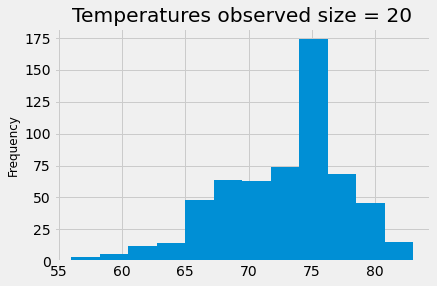

<Figure size 432x288 with 0 Axes>

In [18]:
Graph = pd.DataFrame(Final, columns = ['Frequencies'])
Graph.hist(bins = 12)

plt.ylabel("Frequency", fontsize = 12)
plt.title("Temperatures observed size = 20")
plt.show()
plt.savefig('Images/TemperatureObserved.png')

# Close session

In [64]:
# Close Session
session.close()